可以调节的参数非常多，暂时还没有做深入的对比实验

In [142]:
from scipy.io import loadmat
import pandas as pd
import os

data_X = {}
data_y = {}
root = './PIE_dataset'
for name in os.listdir(root):
    mat = loadmat(os.path.join(root, name))
    X = pd.DataFrame(data=mat['fea'])
    y = pd.DataFrame(data=mat['gnd'])
    isTest = pd.DataFrame(data=mat['isTest'])
    X.sample(frac=1, random_state=0)
    y.sample(frac=1, random_state=0)
    isTest.sample(frac=1, random_state=0)
    
    dataset = name[:name.find('_')]
    data_X[dataset] = X
    data_y[dataset] = y

不做降维，直接用SVM来分类
不仅速度慢，而且几乎没有识别正确的

In [159]:
from time import time
from copy import deepcopy
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')


for dataset in data_X:
    print('===================' + dataset + '===================')
    
    X = deepcopy(data_X[dataset])
    y = deepcopy(data_y[dataset])
    X_train = X[isTest[0] == 0]
    X_test = X[isTest[0] == 1]
    y_train = y[isTest[0] == 0].values.ravel()
    y_test = y[isTest[0] == 1].values.ravel()
    
    t0 = time()
#     param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
#                   'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
    # clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
    #                    param_grid, cv=5)
    clf = SVC()
    clf = clf.fit(X_train, y_train)
    print("train done in %0.3fs" % (time() - t0))
    # print("Best estimator found by grid search:")
    # print(clf.best_estimator_)
    
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))

===================Pose29===================
train done in 16.868s
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         3
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         4
          17  

train done in 16.755s
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         3
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         1
     

In [ ]:
import matplotlib.pyplot as plt
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


def title(y_pred, y_test, i):
    pred_name = y_pred[i]
    true_name = y_test[i]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

PCA降维，SVM分类
PCA用SVD实现，当数据集确定并且SVD的特征值降序排列之后，PCA的降维结果就确定了，区别在于取特征值的前多少项
这里n_components取100
一般来说n_components最大取min(n_samples, n_features)，也就是样本数和特征数两者的较小值
在一定范围内，n_components越大，速度就越慢，同时准确率也会提高（暂时还没有做比对实验）

===================Pose29===================
fit done in 1.120s
transform done in 0.035s
train done in 0.482s
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         3
          16       1.00  

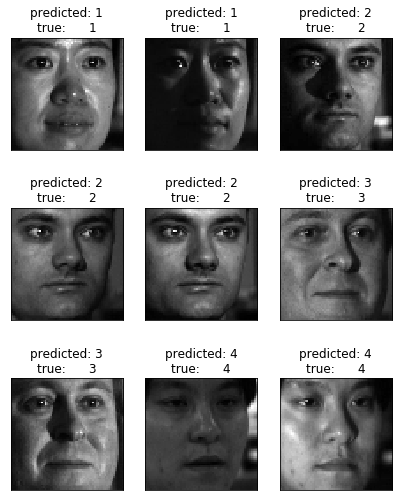

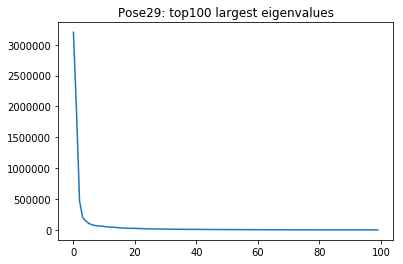

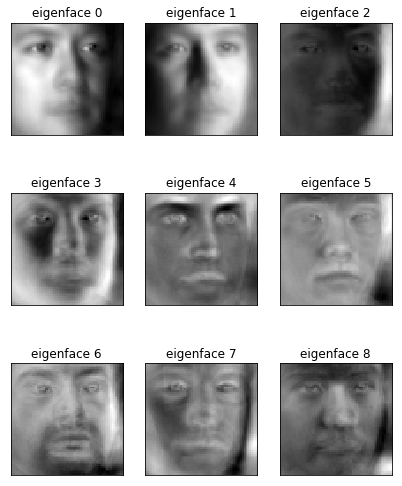

===================Pose27===================
fit done in 1.147s
transform done in 0.062s
train done in 1.030s
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      0.80      0.89         5
          13       0.62      1.00      0.77         5
          14       0.83      1.00      0.91         5
          15       1.00      1.00      1.00         5
          16       1.00  

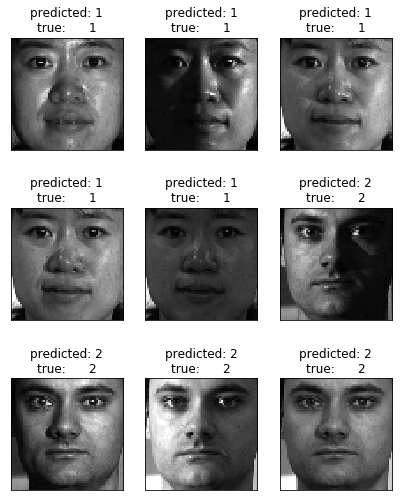

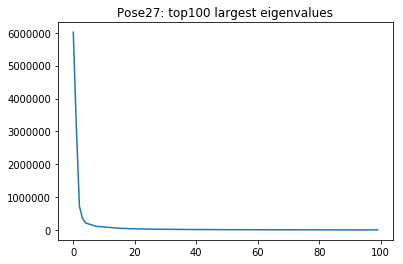

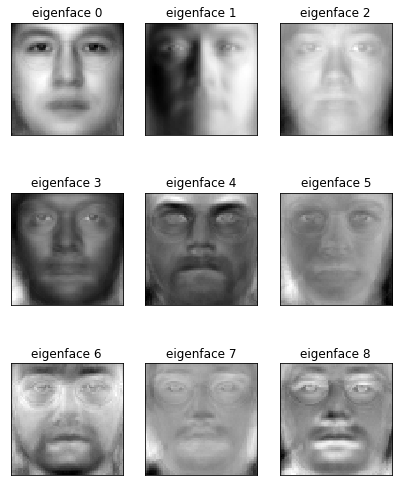

===================Pose07===================
fit done in 0.896s
transform done in 0.037s
train done in 0.494s
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         1
          14       0.67      1.00      0.80         2
          15       1.00      1.00      1.00         3
          16       1.00  

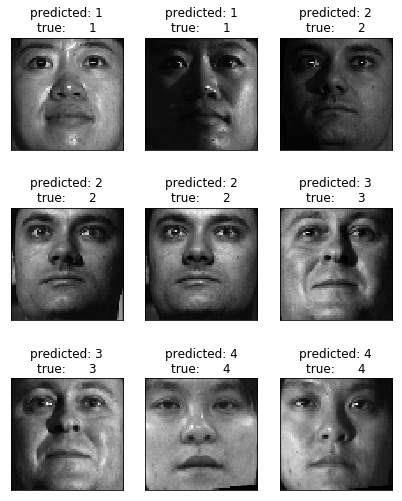

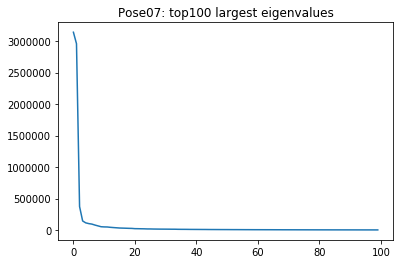

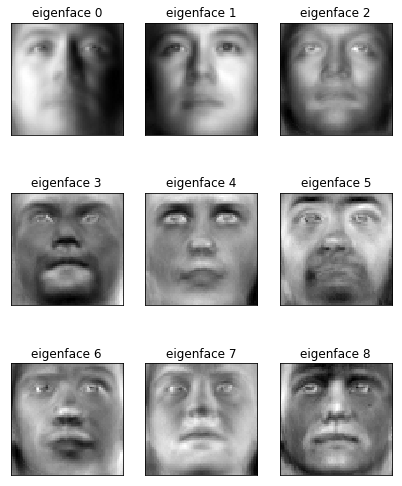

===================Pose09===================
fit done in 1.088s
transform done in 0.044s
train done in 0.489s
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       0.40      1.00      0.57         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       0.80      1.00      0.89         4
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         3
          16       1.00  

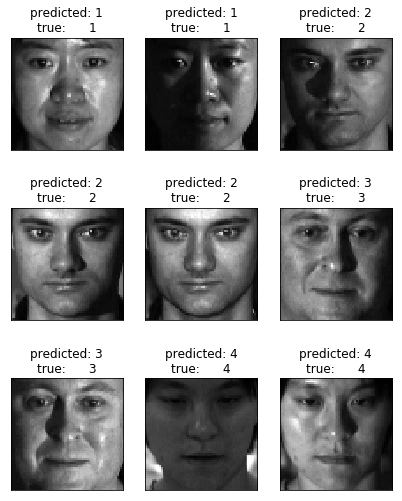

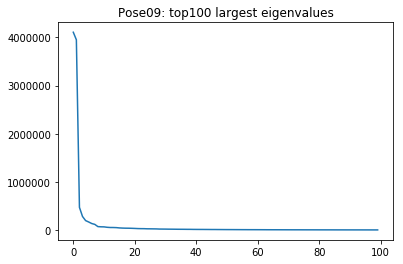

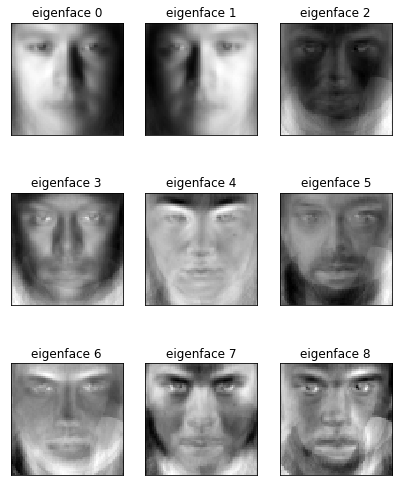

===================Pose05===================
fit done in 1.523s
transform done in 0.059s
train done in 1.135s
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      0.80      0.89         5
          13       0.83      1.00      0.91         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       1.00  

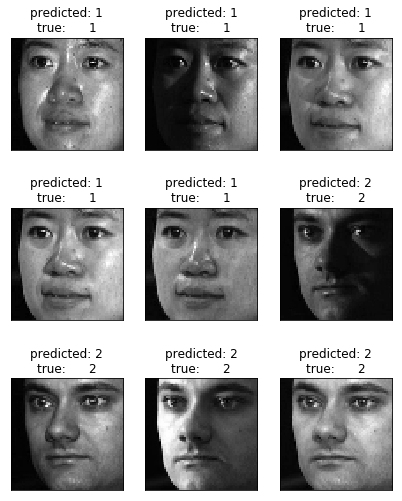

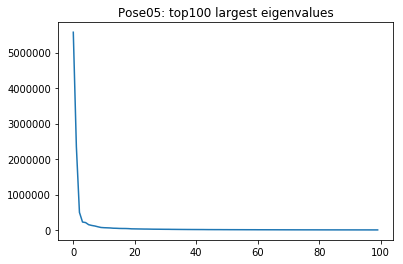

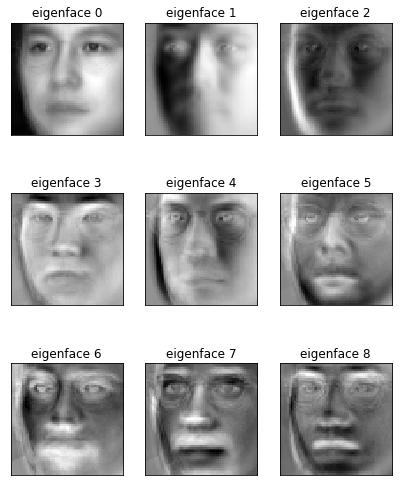

In [153]:
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

n_components = 100

for dataset in data_X:
    print('===================' + dataset + '===================')
    
    X = deepcopy(data_X[dataset])
    y = deepcopy(data_y[dataset])
    X_train = X[isTest[0] == 0]
    X_test = X[isTest[0] == 1]
    y_train = y[isTest[0] == 0].values.ravel()
    y_test = y[isTest[0] == 1].values.ravel()
    
    t0 = time()
    pca = PCA(n_components=n_components, svd_solver='randomized',
              whiten=True).fit(X_train)
    print("fit done in %0.3fs" % (time() - t0))

    t0 = time()
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print("transform done in %0.3fs" % (time() - t0))


    t0 = time()
#     param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
#                   'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
#     clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
#                        param_grid, cv=5)
    clf = SVC()
    clf = clf.fit(X_train_pca, y_train)
    print("train done in %0.3fs" % (time() - t0))
#     print("Best estimator found by grid search:")
#     print(clf.best_estimator_)
    
    y_pred = clf.predict(X_test_pca)
    print(classification_report(y_test, y_pred))
    
    
    prediction_titles = [title(y_pred, y_test, i)
                         for i in range(y_pred.shape[0])]

    #简单挑几个检测结果
    plot_gallery(np.array(X_test), prediction_titles, h, w, n_row=3, n_col=3)
    
    plt.figure()
    plt.plot(range(n_components), pca.explained_variance_)
    plt.title(dataset + ': top' + str(n_components) + ' largest eigenvalues', size=12)
    
    #展示前9个最大的特征值对应的特征脸
    eigenfaces = pca.components_.reshape((n_components, h, w))
    eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
    plot_gallery(eigenfaces, eigenface_titles, h, w, n_row=3, n_col=3)

    plt.show()

LDA降维并分类
在这个数据集上与PCA效果差不多
LDA是有监督学习，降维结果受参数的影响，不需要额外的分类器（初步实验发现LDA的速度慢于PCA）
PCA是无监督学习，降维结果是确定的，需要额外的分类器

In [158]:
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')

n_components = 100

for dataset in data_X:
    print('===================' + dataset + '===================')
    
    X = deepcopy(data_X[dataset])
    y = deepcopy(data_y[dataset])
    X_train = X[isTest[0] == 0]
    X_test = X[isTest[0] == 1]
    y_train = y[isTest[0] == 0].values.ravel()
    y_test = y[isTest[0] == 1].values.ravel()
    
    t0 = time()
    lda = LinearDiscriminantAnalysis(n_components=n_components).fit(X_train, y_train)
    print("fit done in %0.3fs" % (time() - t0))

    y_pred = lda.predict(X_test)
    print(classification_report(y_test, y_pred))

===================Pose29===================
fit done in 2.919s
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       0.33      1.00      0.50         1
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         3
          16       1.00      0.75      0.86         4
          17     

fit done in 2.991s
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         4
          17       1.00      1.00      1.00         1
        